In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('../data/interim/dataset.csv')
df.head()

,year,GEO,Compensation of employees per hour worked (Euro),Compensation per employee (Euro),education,population,rd_expenditure
0,2010,Belgium,34.3,49054.8,48.457143,10839905,2.06
1,2011,Belgium,35.1,50593.5,47.857143,11000638,2.17
2,2012,Belgium,36.2,52178.2,48.242857,11075889,2.28
3,2013,Belgium,37.2,53452.5,49.242857,11137974,2.33
4,2014,Belgium,37.6,53965.2,50.285714,11180840,2.37


In [10]:
df.rename(columns={
    'Compensation of employees per hour worked (Euro)': 'per_hour_worked',
    'Compensation per employee (Euro)': 'per_employee',
}, inplace=True)

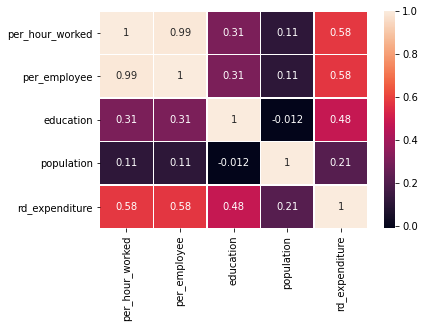

In [11]:
corr = df[[
    'per_hour_worked',
    'per_employee',
    'education',
    'population',
    'rd_expenditure']].corr()
sns.heatmap(corr, annot=True, linewidths=0.5)

In [82]:
temp = df[df['year'] == 2018]
temp = temp.groupby(['GEO']).mean().reset_index()
temp = temp.sort_values(by='per_hour_worked', ascending=False)
n = 5
top_countries = temp['GEO'].head(n).tolist()
worst_countries = temp['GEO'].tail(n).tolist()
countries = top_countries + worst_countries
print(f'Top {n}: {top_countries}')
print(f'Worst {n}: {worst_countries}')

temp = df[df['GEO'].isin(countries)]

Top 5: ['Switzerland', 'Norway', 'Luxembourg', 'Iceland', 'Denmark']
Worst 5: ['Romania', 'Bulgaria', 'Montenegro', 'North Macedonia', 'Serbia']


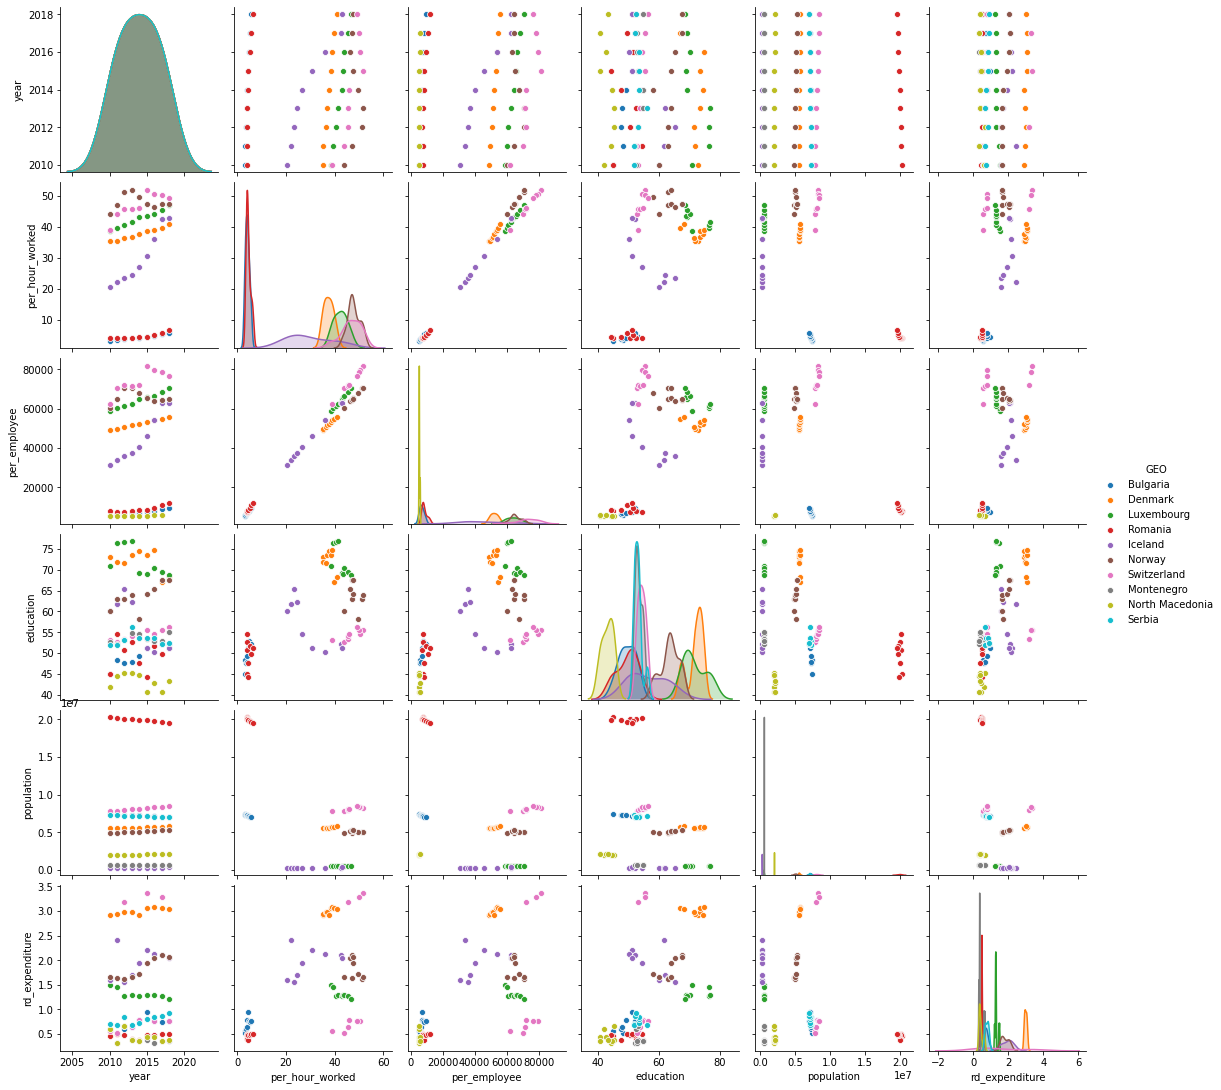

In [81]:
sns.pairplot(temp, hue='GEO')

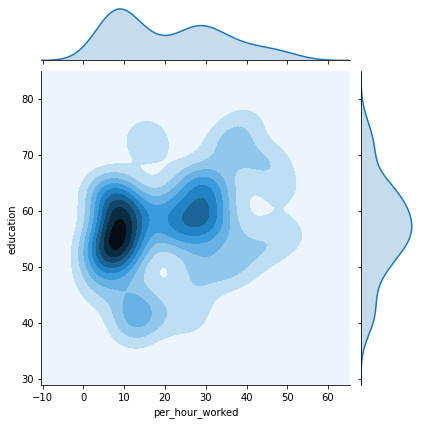

In [13]:
sns.jointplot(data=df, x='per_hour_worked', y='education', kind='kde')

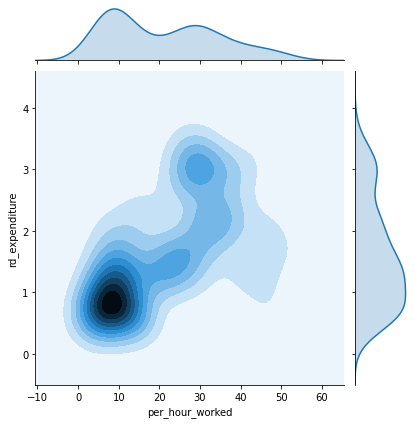

In [14]:
sns.jointplot(data=df, x='per_hour_worked', y='rd_expenditure', kind='kde')

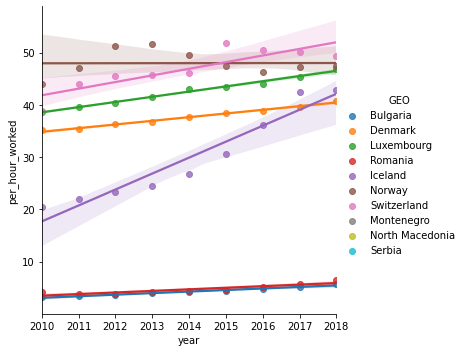

In [52]:
sns.lmplot(data=temp, x='year', y='per_hour_worked', hue='GEO')

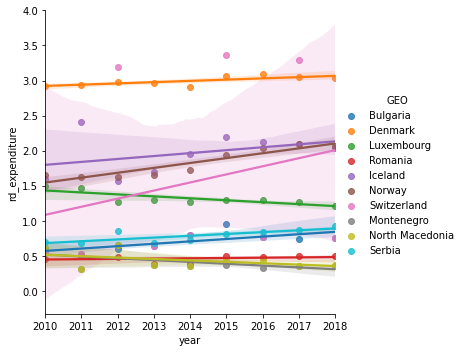

In [49]:
sns.lmplot(data=temp, x='year', y='rd_expenditure', hue='GEO')

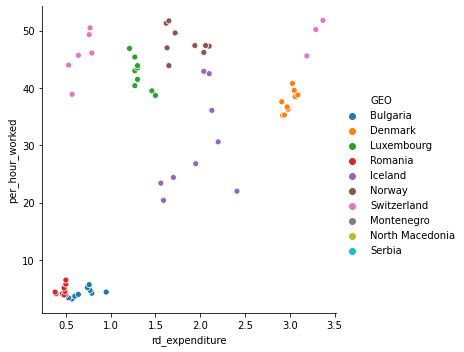

In [73]:
sns.relplot(data=temp, x='rd_expenditure', y='per_hour_worked', hue='GEO')